In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plots

In [3]:

df = pd.read_csv('results/profile_optimizer_funcs_large-0-8-snellius.csv')
rename_dict = {
    'current_meshes': 'compute meshes',
    'compute_cdt': 'compute CDT',
    'compute_cat_cells': 'compute CAT cells',
    'optimize_positions': 'optimize positions',
    'process_iteration': 'process iteration',
    'n_objects': 'number of objects',
    'n_threads': 'threads',
    'time_per_object': 'time per object (s)',
    'time': 'time (s)',
    'stage': 'step',
}


# remove outliers
df.drop(df[df['iteration'] == 8].index, inplace=True)
def step_to_first_and_last(x):
    if x == 0:
        return 'first'
    elif x == 8:
        return 'final'
    else:
        return x

df.rename(columns=rename_dict, inplace=True)
functions = ['compute meshes', 'compute CDT', 'compute CAT cells', 'optimize positions', 'process iteration']

df['step'] = df['step'].apply(step_to_first_and_last)

df_melted = df.melt(id_vars=['iteration', 'number of objects', 'step', 'threads'],
                    value_vars=functions,
                    var_name='function',
                    value_name='time')

df_melted['time'] = df_melted['time'] / 1000000
df_melted = df_melted.assign(time_per_object = df_melted['time'] / df_melted['number of objects'])


     
df_melted.rename(columns=rename_dict, inplace=True)

NOBJS_X_TICKS = df_melted['number of objects'].unique()
NTHREADS_X_TICKS = df_melted['threads'].unique()
# print(f"shape of df: {df.shape}, shape of df_melted: {df_melted.shape}")
df_melted.head()


,iteration,number of objects,step,threads,function,time (s),time per object (s)
0,0,8,first,1,compute meshes,0.003426,0.000428
1,0,8,first,2,compute meshes,0.003297,0.000412
2,0,8,first,4,compute meshes,0.003328,0.000416
3,0,8,first,8,compute meshes,0.003276,0.000410
4,0,8,first,16,compute meshes,0.003304,0.000413


In [4]:

df.groupby(['step', 'number of objects']).describe()

iteration                                          \
                            count mean       std  min  25%  50%  75%  max   
step  number of objects                                                     
final 8                      24.0  1.0  0.834058  0.0  0.0  1.0  2.0  2.0   
      16                     24.0  1.0  0.834058  0.0  0.0  1.0  2.0  2.0   
      32                     24.0  1.0  0.834058  0.0  0.0  1.0  2.0  2.0   
      64                     24.0  1.0  0.834058  0.0  0.0  1.0  2.0  2.0   
      128                    24.0  1.0  0.834058  0.0  0.0  1.0  2.0  2.0   
      256                    16.0  0.5  0.516398  0.0  0.0  0.5  1.0  1.0   
first 8                      24.0  1.0  0.834058  0.0  0.0  1.0  2.0  2.0   
      16                     24.0  1.0  0.834058  0.0  0.0  1.0  2.0  2.0   
      32                     24.0  1.0  0.834058  0.0  0.0  1.0  2.0  2.0   
      64                     24.0  1.0  0.834058  0.0  0.0  1.0  2.0  2.0   
      128                    24.0  1.0  0.834058  0.0  0.0  1.0  2.0  2.0   
      256                    16.0  0.5  0.516398  0.0  0.0  0.5  1.0  1.0   

                        threads          ... optimize positions              \
                          count    mean  ...                75%         max   
step  number of objects                  ...                                  
final 8                    24.0  31.875  ...          27188.575   4041089.4   
      16                   24.0  31.875  ...          40094.400   5592321.6   
      32                   24.0  31.875  ...         102995.425  13341386.0   
      64                   24.0  31.875  ...         175073.100  21251955.7   
      128                  24.0  31.875  ...         230446.375  37144972.4   
      256                  16.0  31.875  ...         273837.100  83165600.0   
first 8                    24.0  31.875  ...           6066.750   1165156.6   
      16                   24.0  31.875  ...          12221.425   1549448.1   
      32                   24.0  31.875  ...          24734.050   2317553.2   
      64                   24.0  31.875  ...          60278.175   3718335.1   
      128                  24.0  31.875  ...          88946.100   7572224.7   
      256                  16.0  31.875  ...          99558.300  12950528.5   

                        process iteration                              \
                                    count          mean           std   
step  number of objects                                                 
final 8                              24.0  2.068110e+06  1.501749e+04   
      16                             24.0  3.763584e+06  2.513923e+04   
      32                             24.0  1.534979e+07  1.314376e+05   
      64                             24.0  3.815836e+07  2.145722e+06   
      128                            24.0  1.346680e+08  3.304321e+07   
      256                            16.0  1.191307e+09  2.690315e+08   
first 8                              24.0  2.519639e+05  2.635922e+03   
      16                             24.0  8.428482e+05  8.894433e+03   
      32                             24.0  2.141312e+06  6.587094e+05   
      64                             24.0  5.067592e+06  2.240794e+05   
      128                            24.0  2.487120e+07  6.037454e+06   
      256                            16.0  1.880000e+08  2.094716e+07   

                                                                  \
                                 min           25%           50%   
step  number of objects                                            
final 8                    2051259.3  2.058371e+06  2.064501e+06   
      16                   3720600.1  3.749317e+06  3.759998e+06   
      32                  15136145.2  1.523026e+07  1.535681e+07   
      64                  36584752.1  3.680687e+07  3.707059e+07   
      128                107061242.2  1.089000e+08  1.260546e+08   
      256                950935925.0  9.79

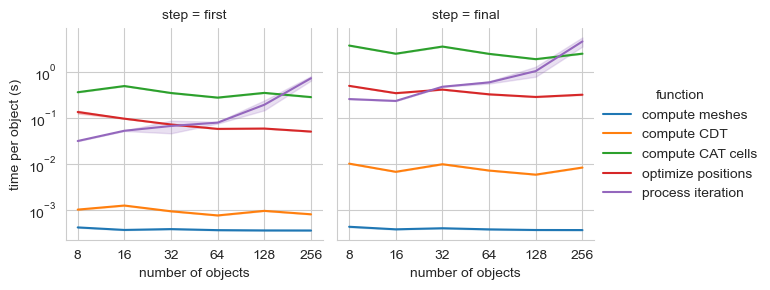

In [5]:
# sns.lineplot(data=df_melted, x='number of objects', y='time (s)', hue='function', style='step',errorbar='sd')
# for stage in range(9):
    # sns.lineplot(data=df_melted[df_melted["stage"] == stage], x='number of objects', y='time (s)', hue='function',errorbar='sd')
    # sns.lineplot(data=df_melted[df_melted["stage"] == stage], x='number of objects', y='time (s)', hue='function',errorbar='sd')
    # plt.show()


df_0_8_stage = df_melted[
    ((df_melted['step'] == 'first')| (df_melted['step'] == 'final')) & (df_melted['function'] != 'optimize positions') |
    ((df_melted['step'] == 'final')| (df_melted['step'] == 'first')) & (df_melted['function'] == 'optimize positions') & (df_melted['threads'] == 1)
]

g = sns.FacetGrid( df_0_8_stage, col='step', hue="function", sharex=False, sharey=True)
g.map(sns.lineplot, 'number of objects', 'time per object (s)', errorbar='sd').set(yscale = 'log', xscale='log', xticks=NOBJS_X_TICKS, xticklabels=NOBJS_X_TICKS)
g.add_legend()
g.savefig('results/figures/exp_stage0_8_snellius.pdf')

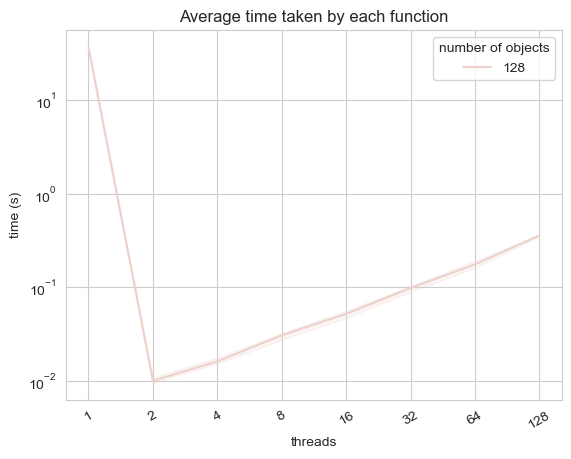

In [6]:
# Bar Plot
df_last_stage_optimize_pos = df_melted[(df_melted['step'] == 'final') & (df_melted['function'] == 'optimize positions') &(df_melted['number of objects'] == 128)]
df_last_stage = df_melted[(df_melted['step'] == 'final')]
sns.lineplot(data=df_last_stage_optimize_pos, x='threads', y='time (s)',hue='number of objects') #, kind='bar')
plt.title('Average time taken by each function')
plt.yscale('log')
plt.xscale('log')
plt.xticks(rotation=30, ticks=NTHREADS_X_TICKS, labels=NTHREADS_X_TICKS)
plt.show()


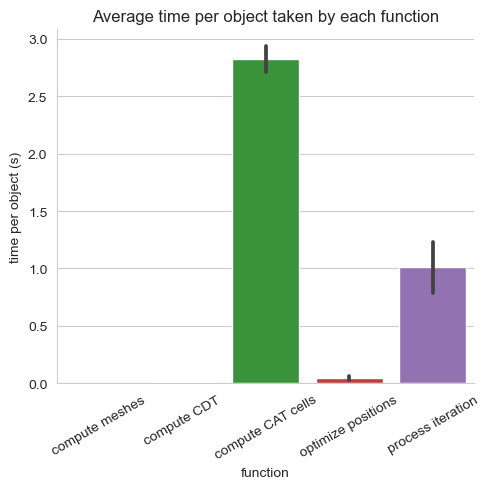

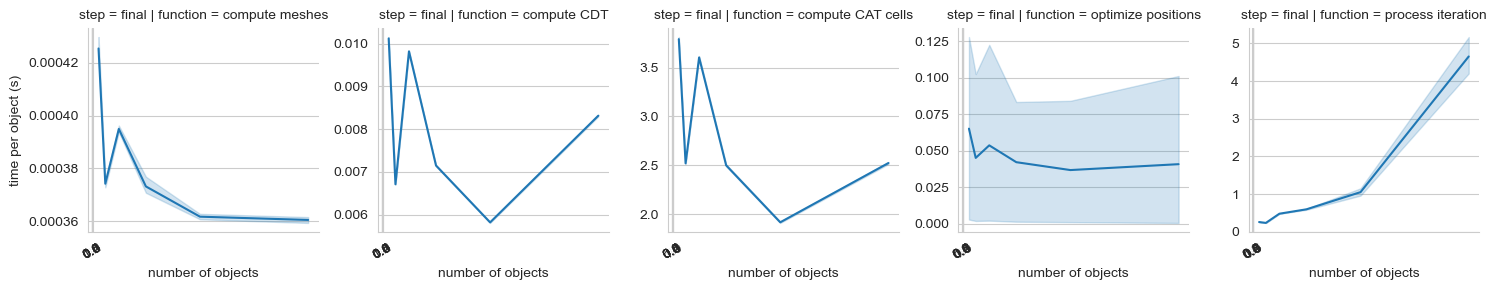

compute meshes


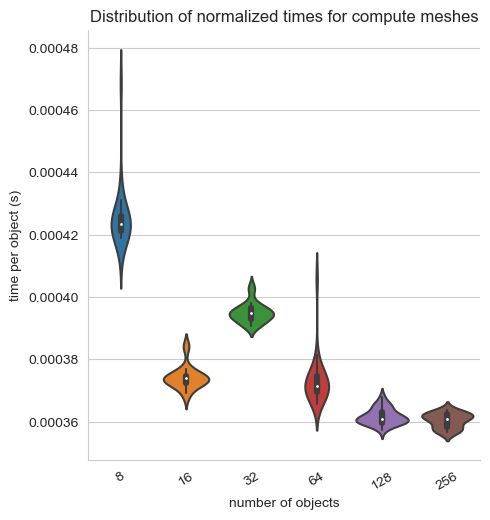

compute CDT


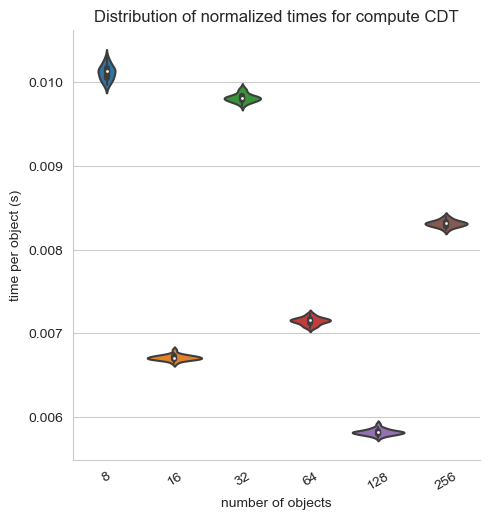

compute CAT cells


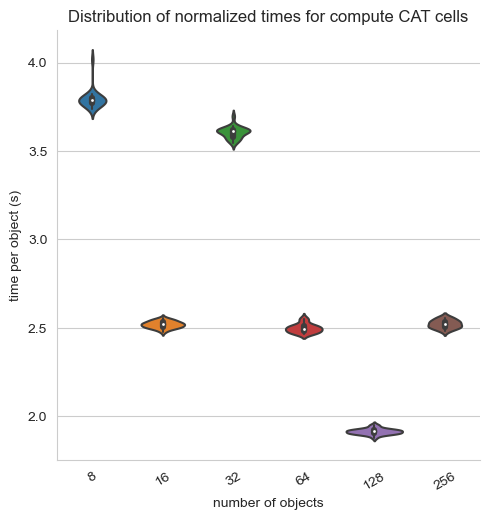

optimize positions


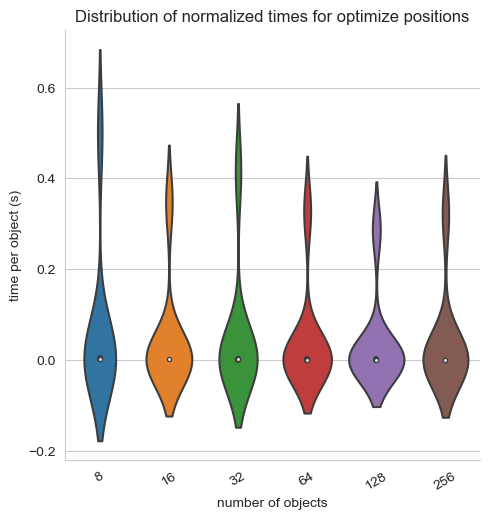

process iteration


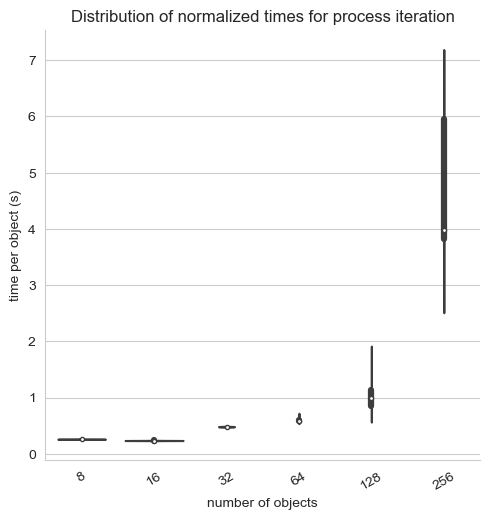

In [7]:
# Bar Plot
# sns.catplot(data=df_last_stage[df_last_stage['threads']==1], x='function', y='time per object (s)', kind='bar')
sns.catplot(data=df_last_stage, x='function', y='time per object (s)', kind='bar')
plt.title('Average time per object taken by each function')
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig('results/figures/functional_comp_final_snellius.pdf')
plt.show()

# # Violin Plot
# sns.catplot(data=df_last_stage, x='function', y='time per object (s)',hue='number of objects', kind='violin')
# plt.title('Distribution of normalized times for each function')
# plt.xticks(rotation=30)
# plt.show()

# # Line Plot
# sns.lineplot(data=df_last_stage, x='iteration', y='time per object (s)', hue='function')
# plt.title('Normalized time taken by each function across iterations')
# plt.show()

# Facet Grid
g = sns.FacetGrid(df_last_stage, col='function', row='step', sharex=False, sharey=False)
g.set_xticklabels(rotation=30)
g.map(sns.lineplot, 'number of objects', 'time per object (s)')
g.add_legend()
plt.show()

# Plot the time taken for each method against the iteration number
for func in functions:
    print(func)
    sns.catplot(data=df_last_stage[df_last_stage['function'] == func], x='number of objects', y='time per object (s)', kind='violin')
    plt.title(f'Distribution of normalized times for {func}')
    plt.xticks(rotation=30)
    plt.show()

<Axes: xlabel='number of objects', ylabel='time (s)'>

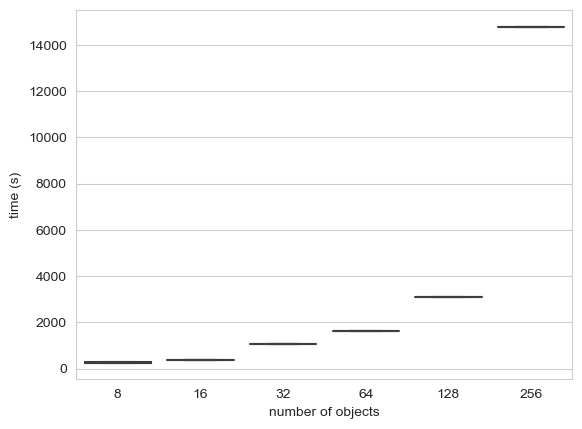

In [8]:
# Create box plots for each parameter against each method


# for param in ['number of objects', 'step',]:
#     for method in ['compute meshes', 'compute CDT', 'compute CAT cells', 'optimize positions', 'process iteration']:
#         sns.boxplot(data=df, x=param, y=method, showfliers = False)
#         plt.title(f'{method} performance across different {param}')
#         plt.show()
        
df_time_per_fn = df_last_stage \
    .groupby(['number of objects', 'iteration']) \
    .agg({'time (s)': ['sum']}) \
    .reset_index(col_level=0) \
    .droplevel(1, axis=1)


sns.boxplot(data=df_time_per_fn, x='number of objects', y='time (s)', showfliers = False)

This plot shows the time taken by each function as a ratio of the time taken by compute CDT. n = 128, step = final


,function,time (s),time / compute CDT
2,compute meshes,0.046296,0.062129
1,compute CDT,0.745152,1.000000
3,optimize positions,4.688833,6.292453
4,process iteration,134.667990,180.725588
0,compute CAT cells,245.137027,328.975975


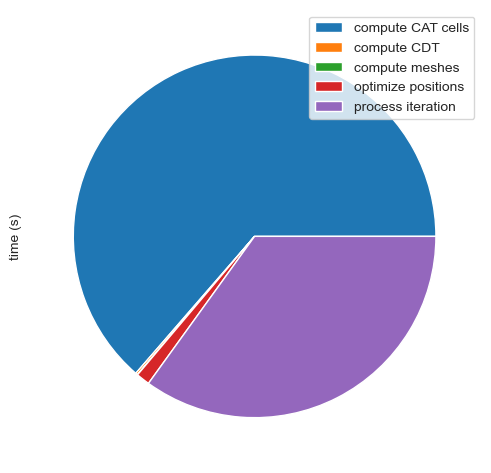

In [9]:


    
df_time_per_fn = df_last_stage[df_last_stage['number of objects'] == 128] \
    .groupby(['function']) \
    .agg({'time (s)': ['mean']}) \
    .reset_index(col_level=0) \
    .droplevel(1, axis=1)
     
df_time_per_fn.plot.pie(y='time (s)', labels=['','','','',''],figsize=(5, 5))

df.plot.pie
plt.legend(loc='upper right', labels=df_time_per_fn['function'])
    # .plot.pie(y='time (ns)', labels=df_last_stage['function'], figsize=(5, 5))
plt.tight_layout()

# df_time_per_fn['time (s)'] / df_time_per_fn[df_time_per_fn['function'] != 'compute CDT']['time (s)']
# df_time_per_fn['time / compute CDT'] = df_time_per_fn['time (s)'] / df_time_per_fn[df_time_per_fn['function'] == 'compute CDT']['time (s)']
cdt_time = df_time_per_fn[df_time_per_fn['function'] == 'compute CDT']['time (s)'].values
print("This plot shows the time taken by each function as a ratio of the time taken by compute CDT. n = 128, step = final")
df_time_per_fn['time / compute CDT'] = df_time_per_fn['time (s)'].values / cdt_time
df_time_per_fn.sort_values(by="time (s)")


In [10]:
df_time_per_fn = df_last_stage[df_last_stage['number of objects'] == 8] \
    .groupby(['function', 'threads']) \
    .agg({'time (s)': ['mean']}) \
    .reset_index(col_level=0) 

In [11]:
df_time_per_fn

,function,threads,time (s)
,,,mean
0,compute CAT cells,1,30.228346
1,compute CAT cells,2,30.295191
2,compute CAT cells,4,30.687210
3,compute CAT cells,8,30.273052
4,compute CAT cells,16,30.220643
5,compute CAT cells,32,30.423113
6,compute CAT cells,64,30.343623
7,compute CAT cells,128,30.310007
8,compute CDT,1,0.081169


In [12]:
nlc_df = pd.read_csv('results/collect_nlc_perf_data_numbaTrue.csv')
nlc_df.rename(columns=rename_dict, inplace=True)
nlc_df[nlc_df['threads'] == 1]

,iteration,number of objects,step,threads,runtime,numba
0,0,8,8,1,145.825986,True
8,0,8,0,1,20.273972,True
16,0,16,8,1,211.226604,True
24,0,16,0,1,88.065397,True
32,0,32,8,1,566.532135,True
40,0,32,0,1,170.242592,True
48,0,64,8,1,904.683137,True
56,0,64,0,1,235.309350,True
64,0,128,8,1,1584.746559,True
72,0,128,0,1,564.196588,True


<Axes: xlabel='number of objects', ylabel='runtime'>

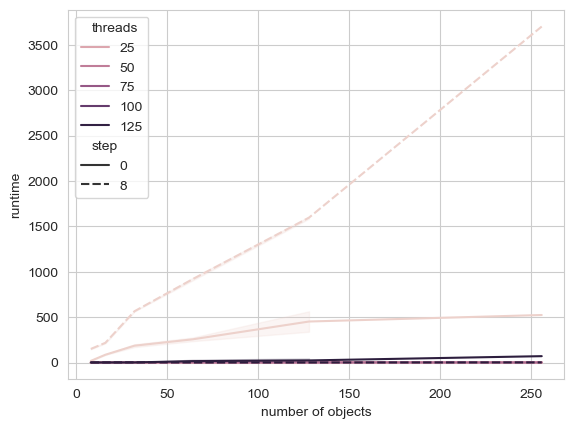

In [13]:
sns.lineplot(data=nlc_df, x='number of objects', y='runtime', hue='threads', style='step')

In [15]:
cp_df = pd.read_csv('results/results_test_2023-06-12-06:54:28_bc_max_cellpack_n10.csv')
rename_dict['run_time'] = 'time (s)'
cp_df.rename(columns=rename_dict, inplace=True)
cp_df.groupby(['number of objects']).describe()['time (s)']

,count,mean,std,min,25%,50%,75%,max
number of objects,,,,,,,,
4,10.0,0.308454,0.108283,0.160608,0.277698,0.292919,0.298533,0.570842
8,10.0,0.477092,0.267195,0.200966,0.285636,0.408772,0.602568,1.086347
16,10.0,0.611913,0.250891,0.267419,0.410167,0.575511,0.764338,1.077497
32,10.0,0.443602,0.368093,0.140321,0.237350,0.366114,0.405119,1.395244
64,10.0,0.491466,0.219398,0.185240,0.337595,0.508044,0.569957,0.920007
128,10.0,0.512746,0.330101,0.144508,0.307130,0.441154,0.633635,1.215786


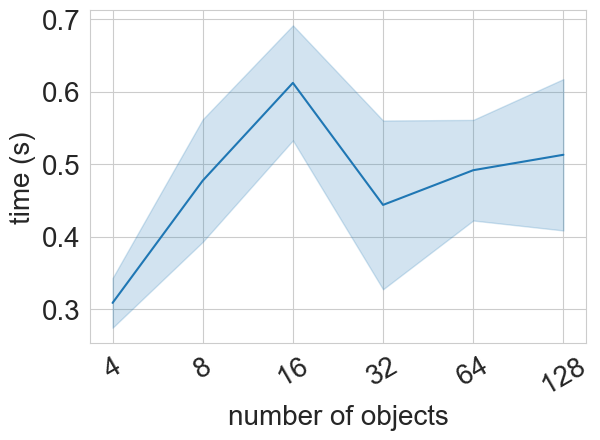

In [21]:
import matplotlib

matplotlib.rcParams.update({'font.size': 20})

NOBJS_X_TICKS = cp_df['number of objects'].unique()
sns.lineplot(data=cp_df, x='number of objects', y='time (s)', errorbar='se')
plt.xscale('log')
# plt.yscale('log')
plt.xticks(rotation=30, ticks=NOBJS_X_TICKS, labels=NOBJS_X_TICKS)
plt.tight_layout()
plt.savefig('results/figures/cellpack_perf.pdf')